## Importing Libraries and Reading Dataset

In [3]:
import seaborn
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
Stock_pair = ['PEP','KO']

## Query historical Stockprices from UniBit.

Downloadable CSV files

https://api.unibit.ai/historicalstockprice/PEP?range=10y&interval=1&datatype=csv&AccessKey=' Use your own API key'
https://api.unibit.ai/historicalstockprice/KO?range=10y&interval=1&datatype=csv&AccessKey= ' Use your own API key'

### PEP Dataset Preparation

In [5]:
df_PEP = pd.read_csv('input.csv')
df.head()

,date,open,high,low,close,adj close,volume
0,2019-03-26,121.46,122.020,121.260,122.16,122.02,4582960
1,2019-03-25,120.26,121.290,120.080,120.85,120.85,4158903
2,2019-03-22,119.50,121.290,119.447,120.72,120.72,5399187
3,2019-03-21,118.01,119.665,118.010,119.44,119.44,3978848
4,2019-03-20,118.07,119.480,117.350,118.32,118.32,5733500


In [6]:
df_PEP = pd.DataFrame(df_PEP.iloc[:,[0,4]])
df_PEP.head()

,date,close
0,2019-03-26,122.16
1,2019-03-25,120.85
2,2019-03-22,120.72
3,2019-03-21,119.44
4,2019-03-20,118.32


In [7]:
df_PEP.columns = ['date','close']
df_PEP['date'] = pd.to_datetime(df_PEP['date']) #Convert data types to date types
df_PEP = df_PEP.set_index('date') #  Set date as index
print(df_PEP.head())

             close
date              
2019-03-26  122.16
2019-03-25  120.85
2019-03-22  120.72
2019-03-21  119.44
2019-03-20  118.32


In [8]:
df_PEP.loc['2014-12-31':'2013-06-01'].head()

,close
date,
2014-12-31,94.56
2014-12-30,95.96
2014-12-29,96.73
2014-12-26,97.05
2014-12-24,97.09


In [10]:
#choose date from 2013-12-31 to 2012-06-01
df_PEP1 = df_PEP.loc['2014-12-31':'2013-06-01']
df_PEP1.head()

,close
date,
2014-12-31,94.56
2014-12-30,95.96
2014-12-29,96.73
2014-12-26,97.05
2014-12-24,97.09


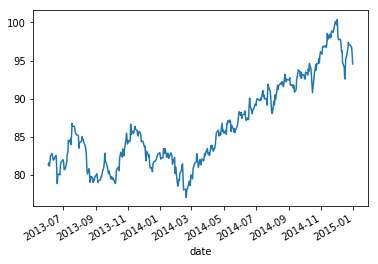

In [11]:
df_PEP1.close.plot()
plt.show()

### KO Dataset Preparation

In [12]:
df_KO = pd.read_csv('input.csv')
df_KO.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-03-16,20.730000,21.004999,20.559999,20.635000,13.731349,23204000
1,2009-03-17,20.670000,20.834999,20.410000,20.725000,13.791243,20241600
2,2009-03-18,20.650000,21.125000,20.500000,20.825001,13.857788,28792800
3,2009-03-19,20.924999,21.125000,20.900000,21.090000,14.034124,22777600
4,2009-03-20,21.160000,21.570000,21.155001,21.320000,14.187182,38328800


In [13]:
df_KO = pd.DataFrame(df_KO.iloc[:,[0,4]])
df_KO.head()

,Date,Close
0,2009-03-16,20.635000
1,2009-03-17,20.725000
2,2009-03-18,20.825001
3,2009-03-19,21.090000
4,2009-03-20,21.320000


In [14]:
df_KO.columns = ['date','close']
#Convert data types to date types
df_KO['date'] = pd.to_datetime(df_KO['date'])  
# Set date to index
df_KO = df_KO.set_index('date') 
print(df_KO.head())

                close
date                 
2009-03-16  20.635000
2009-03-17  20.725000
2009-03-18  20.825001
2009-03-19  21.090000
2009-03-20  21.320000


In [15]:
#choose date from 2013-06-01 to 2014-12-31
df_KO.loc['2013-06-01':'2014-12-31'].head()

,close
date,
2013-06-03,40.810001
2013-06-04,41.419998
2013-06-05,40.650002
2013-06-06,40.790001
2013-06-07,41.410000


In [16]:
df_KO1=df_KO.loc['2013-06-01':'2014-12-31']
df_KO1.head()

,close
date,
2013-06-03,40.810001
2013-06-04,41.419998
2013-06-05,40.650002
2013-06-06,40.790001
2013-06-07,41.410000


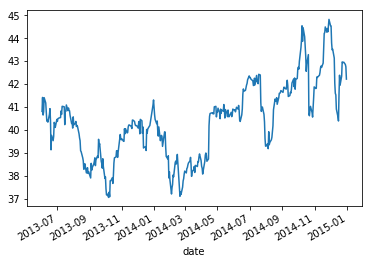

In [17]:
df_KO1.close.plot()
plt.show()

In [18]:
data = pd.concat([df_PEP1,df_KO1],axis=1)   
data.columns = Stock_pair
data.head()

,PEP,KO
date,,
2013-06-03,81.40,40.810001
2013-06-04,81.63,41.419998
2013-06-05,81.20,40.650002
2013-06-06,81.66,40.790001
2013-06-07,82.51,41.410000


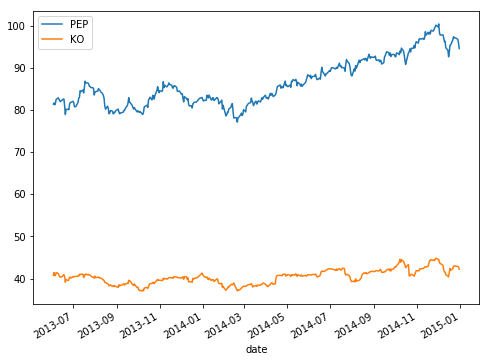

In [19]:
data.plot(figsize =(8,6))

In [20]:
data.corr()  #calculate the correlation between PEP and KO. The higher the stock correlation coefficient, the better.

,PEP,KO
PEP,1.000000,0.854232
KO,0.854232,1.000000


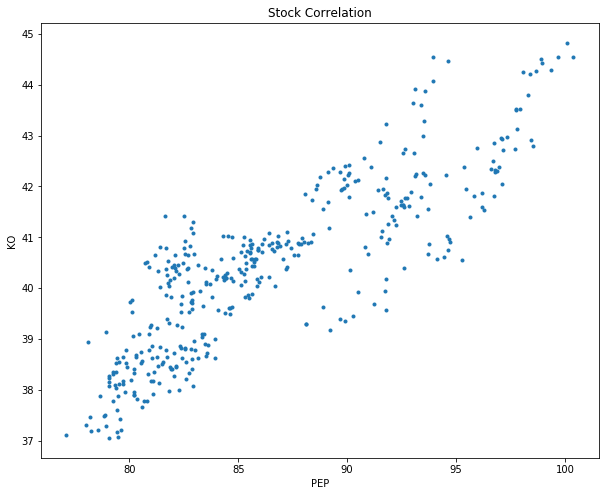

In [21]:
# Plot stock correlation
plt.figure(figsize=(10,8))
plt.title('Stock Correlation')
plt.plot(data['PEP'],data['KO'],'.')
plt.xlabel('PEP')
plt.ylabel('KO')
data.dropna(inplace= True)

In [22]:
[slope,intercept] = np.polyfit(data.iloc[:,0],data.iloc[:,1],1).round(2)   # linear regression between X(PEP) and Y(KO)
slope,intercept

(0.25, 18.65)

In [23]:
data['spread'] = data.iloc[:,1]-(data.iloc[:,0]*slope+intercept)  #error term: ε = y -(ax+b)
data.head()

,PEP,KO,spread
date,,,
2013-06-03,81.40,40.810001,1.810001
2013-06-04,81.63,41.419998,2.362498
2013-06-05,81.20,40.650002,1.700002
2013-06-06,81.66,40.790001,1.725001
2013-06-07,82.51,41.410000,2.132500


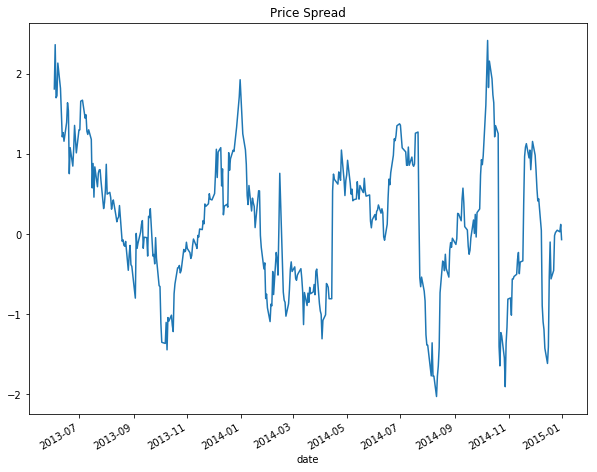

In [24]:
data['spread'].plot(figsize=(10,8),title='Price Spread')    # Mean is around zero 

In [25]:
data['zscore'] = (data['spread']-data['spread'].mean())/data['spread'].std()   #Standardized normal distribution
data.head()

,PEP,KO,spread,zscore
date,,,,
2013-06-03,81.40,40.810001,1.810001,1.942419
2013-06-04,81.63,41.419998,2.362498,2.580407
2013-06-05,81.20,40.650002,1.700002,1.815399
2013-06-06,81.66,40.790001,1.725001,1.844266
2013-06-07,82.51,41.410000,2.132500,2.314820


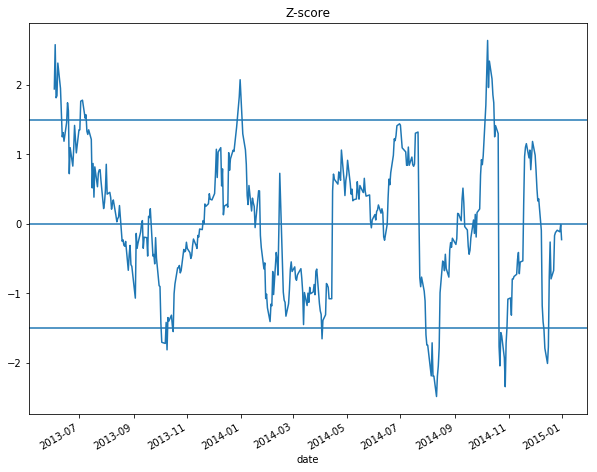

In [26]:
data['zscore'].plot(figsize=(10,8),title='Z-score')   
plt.axhline(1.5)
plt.axhline(0)
plt.axhline(-1.5)

In [27]:
#position 1 represents PEP，1 means long position；-1 means short position；Use fulfill process null value
data['position_1'] = np.where(data['zscore'] > 1.5,1,np.nan)   
data['position_1'] = np.where(data['zscore'] <-1.5,-1,data['position_1'])
data['position_1'] = np.where(abs(data['zscore']) <0.5,0,data['position_1'])

In [28]:
data['position_1'] = data['position_1'].fillna(method = 'ffill')

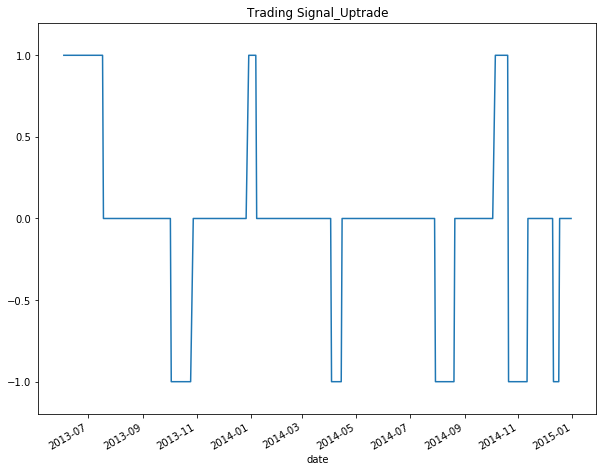

In [29]:
# 8 times trading signal;3 times long PEP, 5 times short KO
data['position_1'].plot(ylim=[-1.2,1.2],figsize = (10,8),title = 'Trading Signal_Uptrade')

In [30]:
#Whenever long one PEP, we short one KO and vice versa. 
data['position_2'] = -np.sign(data['position_1'])

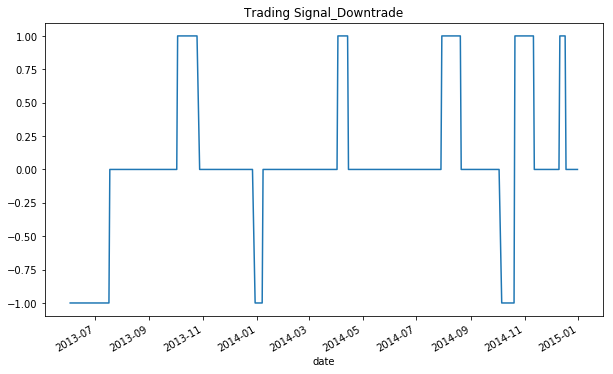

In [31]:
# 8 times trading signal; Five times long KO and 3 times short PEP
data['position_2'].plot(ylim=[-1.1,1.1],figsize=(10,6),title='Trading Signal_Downtrade')

In [36]:
data['PEP']= np.log(df_PEP1/df_PEP1.shift(1))

In [37]:
data['KO']= np.log(df_KO1/df_KO1.shift(1))

In [38]:
data['strategy']=0.5*(data['position_1'].shift(1)* data['PEP'])+0.5*(data['position_2'].shift(1)*data['KO'])

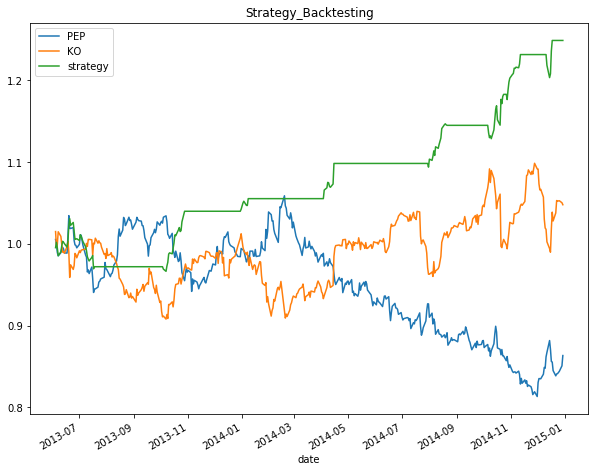

In [39]:
data[['PEP','KO','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,8),title='Strategy_Backtesting')

## There are risks involved in this strategy:
* The strategy generates gains based on the mean-reveting assumption. 
* Spread has likelihood of not returning to mean due to significant changes of market structure
* Commissions and fees are not considered. THe regression coefficidnt needs to be rebalanced.  